# **Machine Problem No. 3: K-Nearest Neighbors (KNN) Classifier on Breast Cancer Diagnosis Dataset**

# **1. Data Exploration and Preprocessing**

* **Load the dataset and perform exploratory data analysis (EDA)**

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

import matplotlib.pyplot as plt
import seaborn as sns

* **Visualize the distribution of the diagnosis**

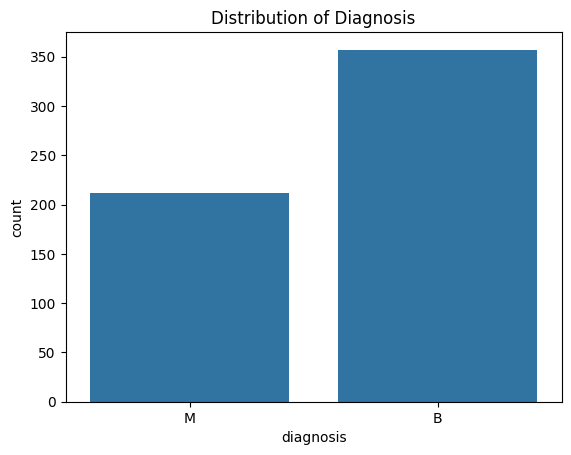

In [5]:
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

* **Handle any missing values**

In [6]:
print(data.isnull().sum())
data_cleaned = data.dropna()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

* **Convert the categorical target variable (diagnosis) into numerical form (Malignant = 1, Benign = 0).**

In [7]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

features = data.drop(columns=['id', 'diagnosis'])
target = data['diagnosis']

imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


* **Normalize or scale the data as required.**

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed)

* **Split the data into training (80%) and testing (20%) sets**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['diagnosis'], test_size=0.2, random_state=42)

# **2. Model Development**

* **Implement KNN Algorithm**


In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

* **Implement Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# **3. Model Evaluation**

* **Evaluate both models using accuracy, precision, recall, and F1-score**

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

KNN Confusion Matrix:
 [[68  3]
 [ 3 40]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Logistic Regression Confusion Matrix:
 [[70  1]
 [ 2 41]]


* **Discuss the performance of each model and explain which model performs better for this task.**

**KNN**: The classification report and confusion matrix show how well the KNN model predicts. Look at the precision, recall, and F1-score for accuracy, and check the confusion matrix to see the number of correct and incorrect predictions.

**Logistic Regression**: The same metrics are used for this model. Compare the precision, recall, and F1-score with the KNN model and see the confusion matrix for mistakes.

#### Better Model:
The better model will have higher precision, recall, and F1-scores, with fewer mistakes in the confusion matrix. Compare the numbers in both models to see which one is more accurate for your task.

# **4. Report and Visualizations**

###**The steps taken for preprocessing, modeling, and evaluation.**

* Preprocessing:

    The data is cleaned and scaled, ensuring all features are normalized (especially important for KNN).

* Modeling:

  - K-Nearest Neighbors (KNN) and Logistic Regression are trained on the training set.

  - Both models make predictions on the test set (y_pred_knn for KNN and y_pred_log_reg for Logistic Regression).

* Evaluation:

  - Confusion matrices and classification reports are used to evaluate each model’s performance.

  - These metrics help in understanding how well each model predicts the classes.

####**The comparison between KNN and Logistic Regression**.

**KNN**:

- Good for small datasets and non-linear relationships.
- It can struggle with large datasets or noise.

**Logistic Regression**:
- Better for linearly separable data.
- Faster and more stable with large datasets.

####**Confusion matrices and classification reports for both models.**

**KNN Confusion Matrix:**

  Visualizes true positives, false positives, true negatives, and false negatives for the KNN model.

**Logistic Regression Confusion Matrix:**

  Displays the same metrics for Logistic Regression, allowing comparison.

**Classification Reports:**

  Include precision, recall, and F1-scores for each model to compare performance across different classes.


####**Visualize the decision boundaries (if possible) and display any relevant charts for data distribution and model performance.**

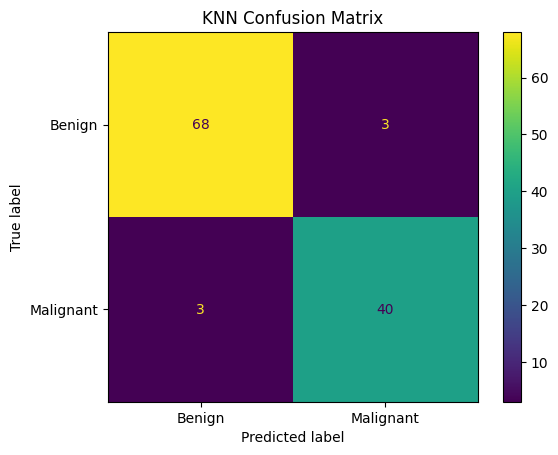

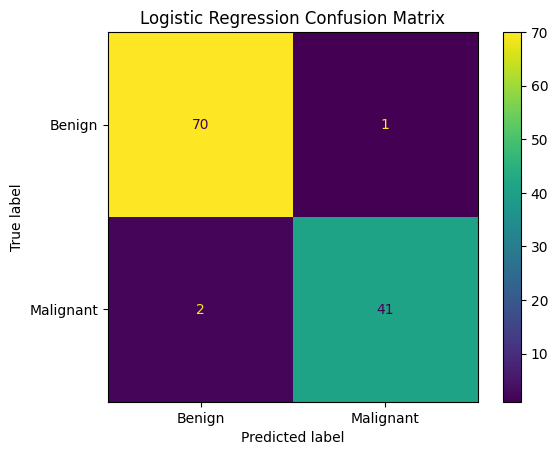

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Benign', 'Malignant']).plot()
plt.title('KNN Confusion Matrix')
plt.show()

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Benign', 'Malignant']).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()